In [1]:
import pandas as pd
import matplotlib as mpl
from cycler import cycler
import calendar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
custom_cycler = (cycler(color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 'lime', 'lavender', 'turquoise', 'darkgreen', 'tan', 'salmon', 'gold']))

In [2]:
df = pd.read_csv('libstats_2020.csv')#, index_col='interaction source')
df['epoch'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')

In [3]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    """
    ax = ax
    for rect in rects:
        height = rect.get_height()
        if not height == 0:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        size=20,
                        ha='center', va='bottom')
        
    return ax

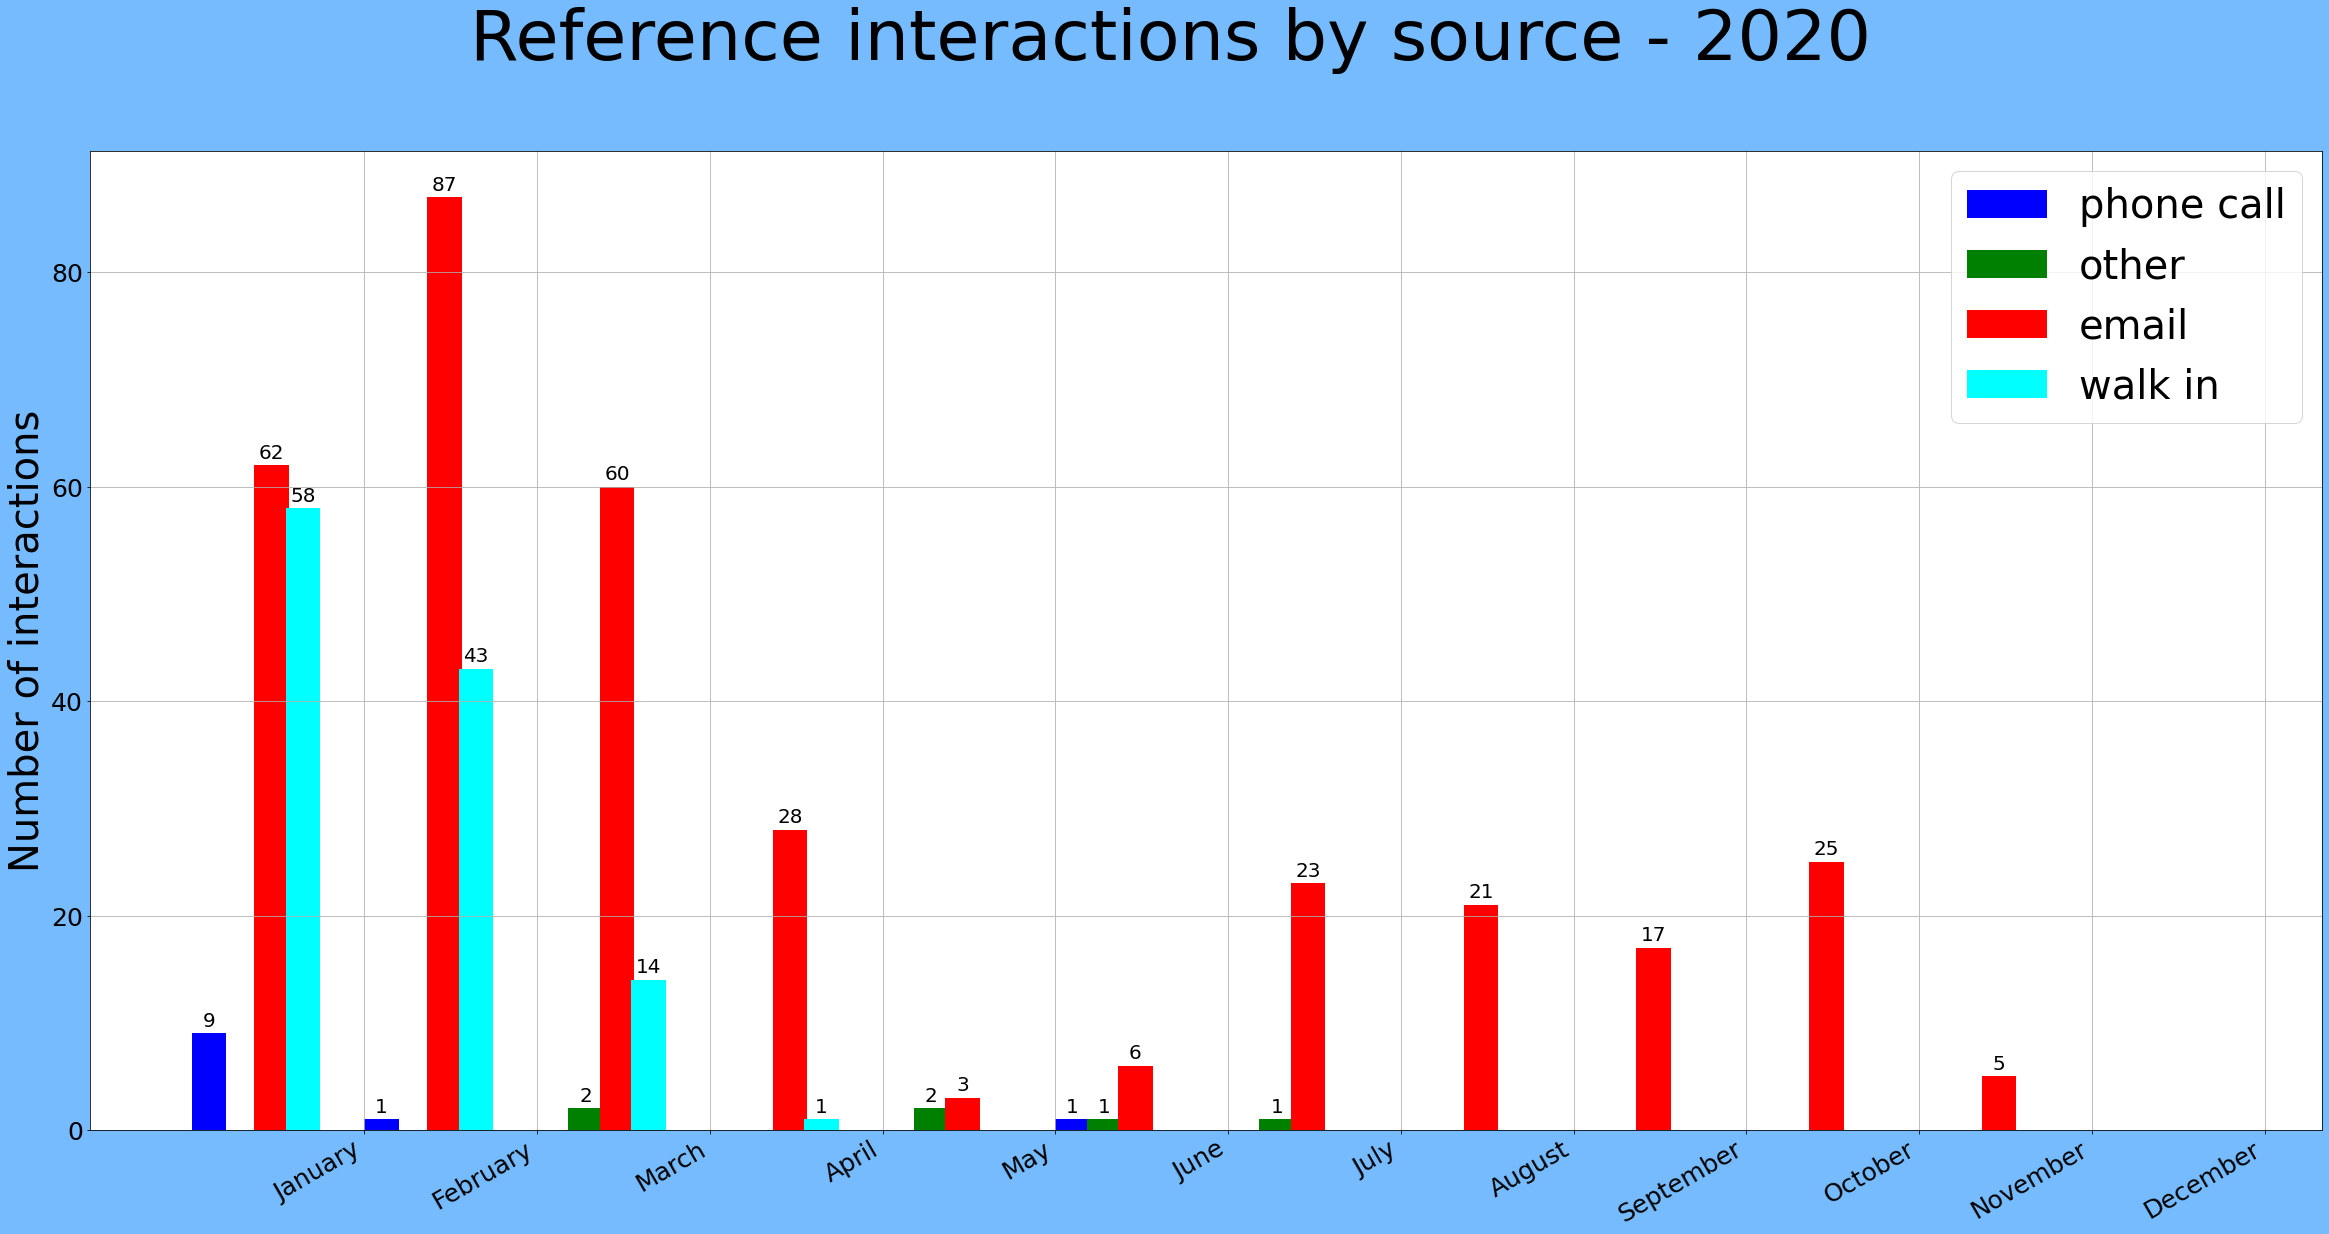

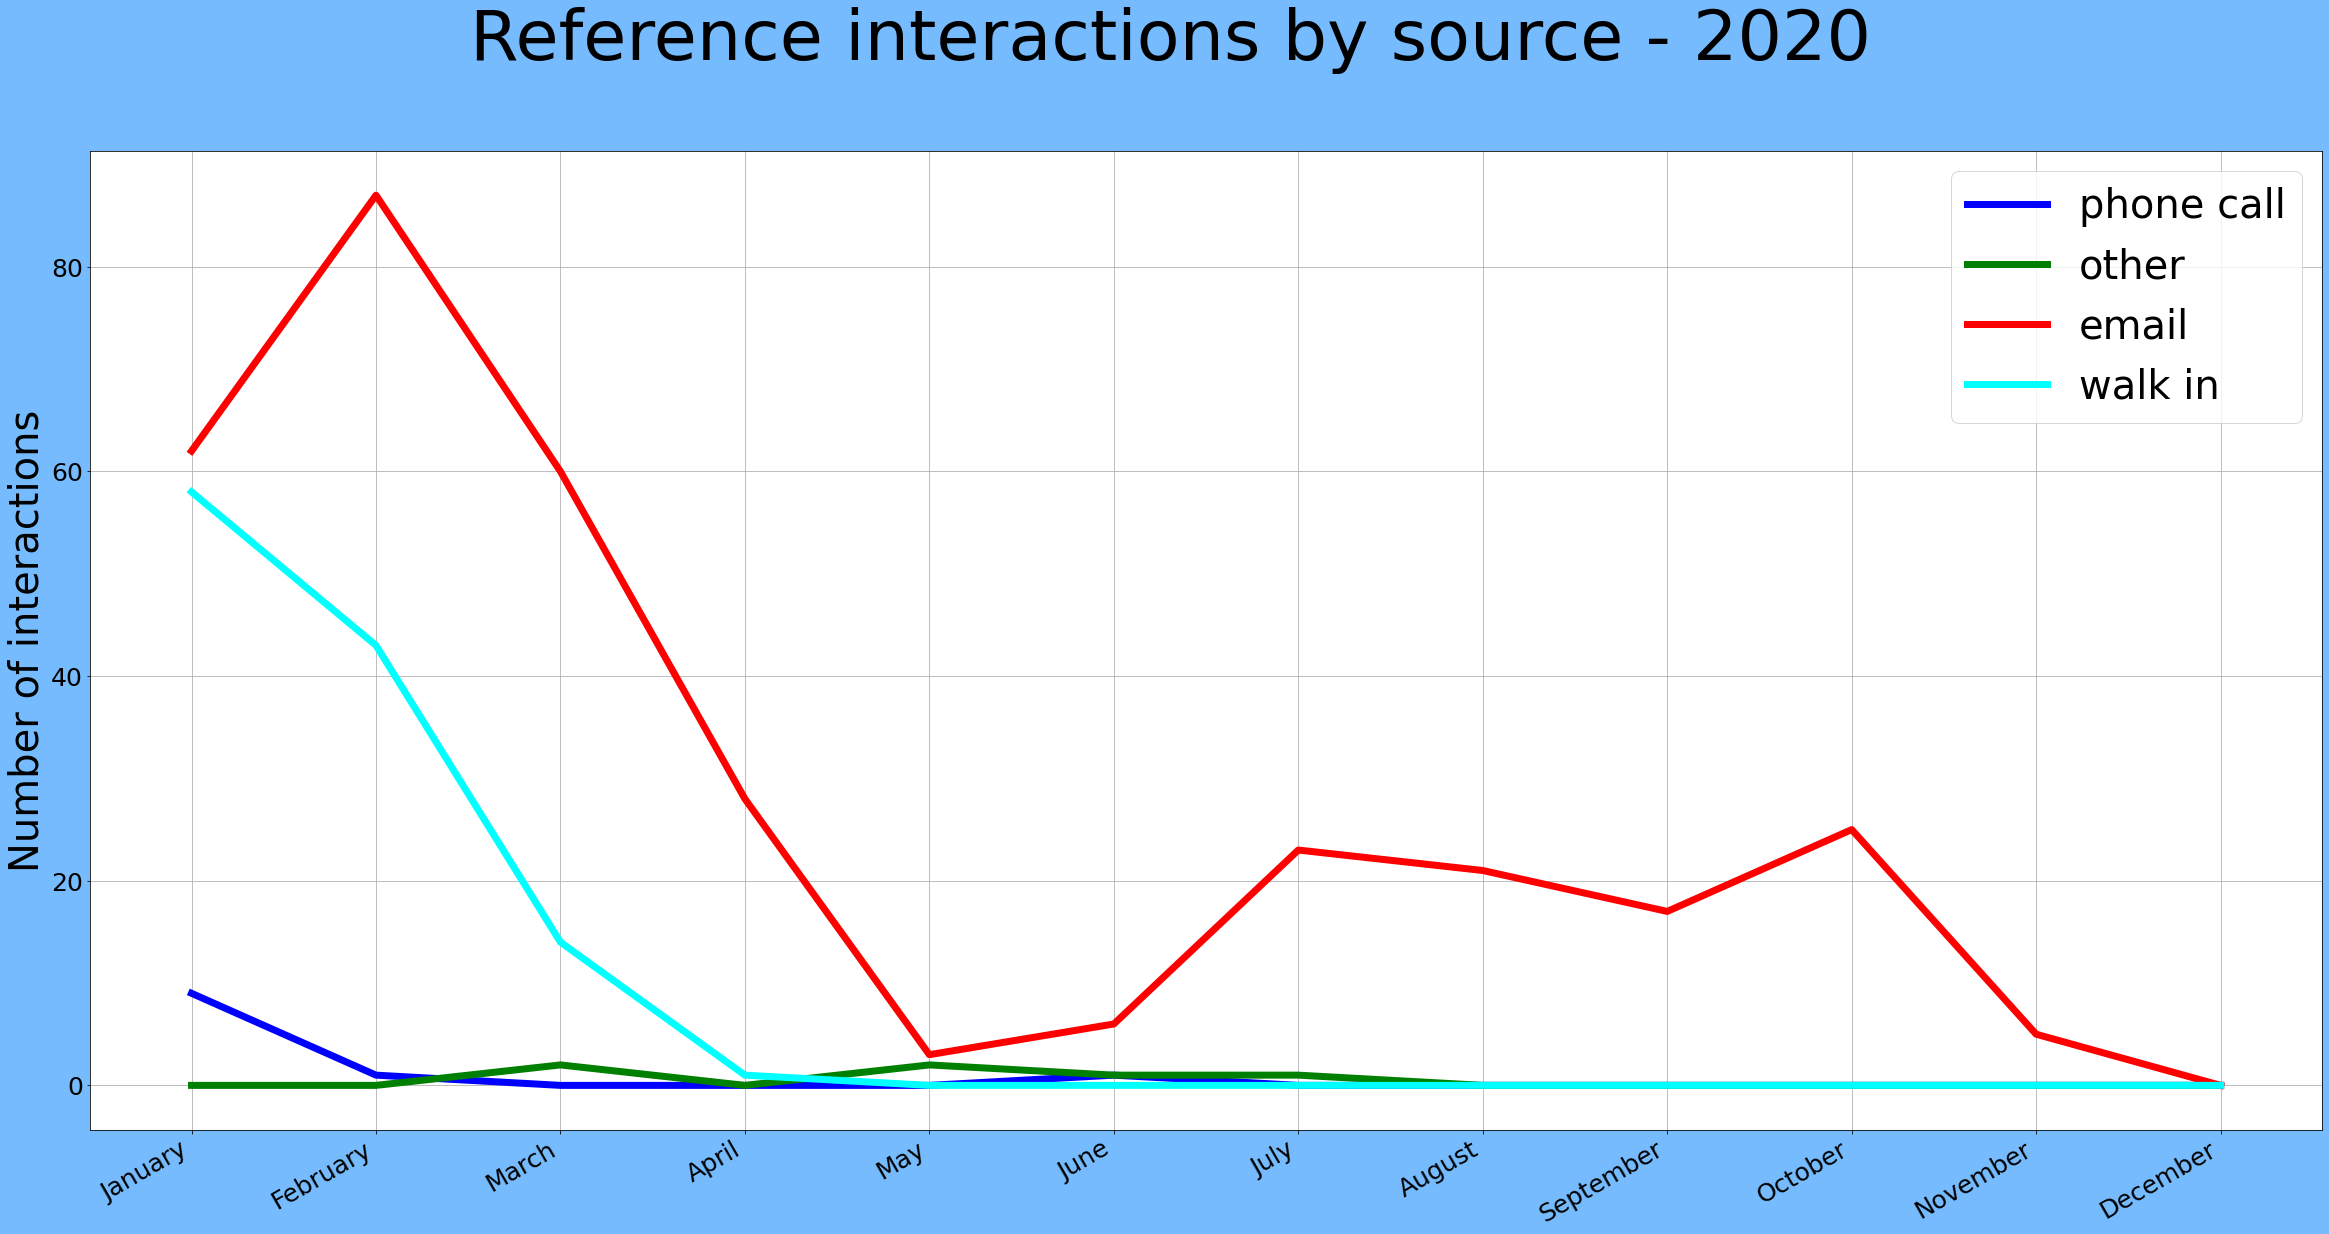

In [8]:
def get_monthly_source_totals(df):
    sub_dataframes = {}
    sources = df.groupby(['interaction source'])
    source_names = set(sources.groups.keys())
    
    for source_name in source_names:
        sub_dataframes[source_name] = []
#         print(source_name)
        for _month in range(1,13):
#             print("month: "+str(_month))
            try:
                this_month = df.groupby(df.epoch.dt.month == _month).get_group(True)
                by_source = this_month.groupby(
                    this_month['interaction source'] == source_name
                )
                monthly_total = len(by_source.get_group(True))
            except KeyError:
                monthly_total = 0
#             print(monthly_total)
            sub_dataframes[source_name].append(monthly_total)
            
#     print(sub_dataframes)
    return sub_dataframes


def monthly_source_totals_barchart(df):
    annual_by_source = get_monthly_source_totals(df)
    
    # plot setup
    fig, ax = plt.subplots(figsize=(40, 20))
    fig.suptitle('Reference interactions by source - 2020',fontsize=70)
    fig.autofmt_xdate()
    fig.patch.set_facecolor('xkcd:sky blue')
    ax.set_prop_cycle(custom_cycler)
    ax.tick_params(axis='x', labelsize= 25)
    ax.tick_params(axis='y', labelsize= 25)
    ax.grid()
    plt.xticks(np.arange(12), calendar.month_name[1:13])
    plt.ylabel("Number of interactions",fontsize=40)

    # bar chart x-value spacing
    spacer = len(annual_by_source.keys())
    spacer = list(np.linspace(start=-1, stop=1.0, num=12))
    x = np.arange(12)
    width = 0.2
    for source,values in annual_by_source.items():
        rect = ax.bar(x+spacer[0], values, width, label=source,align='edge')#,linewidth=7)
        ax = autolabel(rect,ax)
        spacer.pop(0)

    ax.legend(prop={"size":40})
    fig.savefig('by_source_barchart.png')
#     plt.show()

    
def monthly_source_totals_linechart(df):
    annual_by_source = get_monthly_source_totals(df)
    
    fig, ax = plt.subplots(figsize=(40, 20))
    fig.suptitle('Reference interactions by source - 2020',fontsize=70)
    fig.autofmt_xdate()
    fig.patch.set_facecolor('xkcd:sky blue')
    ax.set_prop_cycle(custom_cycler)
    ax.tick_params(axis='x', labelsize= 25)
    ax.tick_params(axis='y', labelsize= 25)
    ax.grid()
    plt.xticks(np.arange(12), calendar.month_name[1:13])
    plt.ylabel("Number of interactions",fontsize=40)
    
    for source,values in annual_by_source.items():
        ax.plot(values,linewidth=7,label=source)
        
    ax.legend(prop={"size":40})
    fig.savefig('by_source_linechart.png')
#     plt.show()
    
monthly_source_totals_barchart(df)
monthly_source_totals_linechart(df)